# Praktikum 7
## Lakukan klasifikasi dengan menggunakan Pendekatan KNN
1. Menggunakan bahasa pemrograman Python
2. Data yang digunakan adalah data iris. 
3. Lakukan skenario dengan K tetangga terdekat (K=3,K=5,K=7)
4. Hitung performa klasifikasi (akurasi) dan sajikan hasil perbandingan

### 1. Melakukan Pembacaan data iris

In [1]:
import pandas as pd
import numpy as np
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
# variabel bebas
x = iris.drop(["variety"], axis = 1)
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#variabel tidak bebas
y = iris["variety"]
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

### 2. Membagi data train dan data test

Data dibagi menjadi 80% data latih dan 20% data uji.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### 3. Penskalaan fitur
Menskalakan fitur sehingga semuanya dapat dievaluasi secara seragam. Rentang nilai data mentah sangat bervariasi, dalam beberapa algoritme pembelajaran mesin, fungsi tujuan tidak akan berfungsi dengan baik tanpa normalisasi. Misalnya, mayoritas pengklasifikasi menghitung jarak antara dua titik dengan jarak Euclidean. Jika salah satu fitur memiliki rentang nilai yang luas, jarak akan diatur oleh fitur khusus ini. Oleh karena itu, kisaran semua fitur harus dinormalisasi sehingga setiap fitur berkontribusi kira-kira secara proporsional dengan jarak akhir.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### 4. Training, Predictions, dan Evaluasi

Untuk training dilakukan dengan mengimport KNeighboursClassifier dari sklearn. Beberapa parameter penting yang biasa digunakan adalah:
1. n_neighbours: nilai k, jumlah tetangga yang dipertimbangkan
2. weight : jika Anda ingin menggunakan atribut berbobot, di sini Anda dapat mengonfigurasi bobotnya. Ini mengambil nilai-nilai seperti seragam, jarak (jarak terbalik ke titik baru) atau dapat dipanggil yang harus ditentukan oleh pengguna. Nilai defaultnya seragam.
3. algorithm: jika Anda menginginkan representasi data yang berbeda, di sini Anda dapat menggunakan nilai seperti ball_tree, kd_tree atau brute, defaultnya adalah auto yang mencoba untuk secara otomatis memilih representasi terbaik untuk kumpulan data saat ini.
4. metric: metrik jarak (Minkowski, Euclidean, Manhattan, dll), defaultnya adalah metric Minkowski dengan p=2 sehingga sama dengan Euclidean metric. Untuk nilai p dapat diubah sesuai kebutuhan.

Pada training kali ini digunakan metric Euclidean

In [6]:
#Definisi Fungsi
def train_and_pred_knn(K):
    from sklearn.neighbors import KNeighborsClassifier
    #default metric KNeighborsClassifier menggunakan Euclidean distance
    classifier = KNeighborsClassifier(n_neighbors=K)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("Prediksi kelas data uji dengan K =",K,":\n\n", y_pred)
    return y_pred

def evaluasi_knn(y_pred, K):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    confusion_matriks = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print("\nconfusion_matrix data uji dengan K =",K,":\n\n",confusion_matriks)
    print("\nclassification_report data uji dengan K =",K,":\n\n",class_report)
    return confusion_matriks, class_report

#### Prediksi dan Evaluasi Untuk K=3

In [7]:
#Train and prediction dengan K=3
y3_pred = train_and_pred_knn(3)
#Evaluasi K=3
confusion_matriks3, class_report3= evaluasi_knn(y3_pred, 3)

Prediksi kelas data uji dengan K = 3 :

 ['Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Virginica' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor' 'Setosa'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Virginica'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa'
 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Versicolor']

confusion_matrix data uji dengan K = 3 :

 [[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]

classification_report data uji dengan K = 3 :

               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Prediksi dan Evaluasi untuk K=5

In [8]:
#Train and prediction dengan K=5
y5_pred = train_and_pred_knn(5)
#Evaluasi K=5
confusion_matriks5, class_report5= evaluasi_knn(y5_pred, 5)

Prediksi kelas data uji dengan K = 5 :

 ['Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Virginica' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor' 'Setosa'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa'
 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Versicolor']

confusion_matrix data uji dengan K = 5 :

 [[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]

classification_report data uji dengan K = 5 :

               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Prediksi dan Evaluasi untuk K=7

In [9]:
#Train and prediction dengan K=7
y7_pred = train_and_pred_knn(7)
#Evaluasi K=7
confusion_matriks7, class_report7= evaluasi_knn(y7_pred, 7)

Prediksi kelas data uji dengan K = 7 :

 ['Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Virginica' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor' 'Setosa'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa'
 'Virginica' 'Virginica' 'Setosa' 'Setosa' 'Versicolor']

confusion_matrix data uji dengan K = 7 :

 [[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]

classification_report data uji dengan K = 7 :

               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 5. Menampilkan hasil perbandingan performa klasifikasi (akurasi)

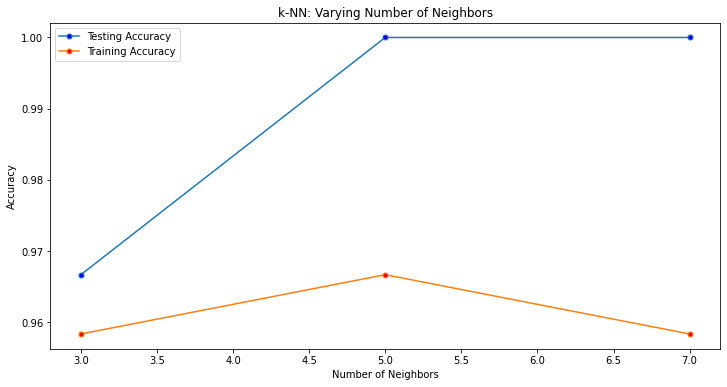

train_akurasi untuk K = 3 adalah 0.9583333333333334
test_akurasi untuk K = 3 adalah 0.9666666666666667 

train_akurasi untuk K = 5 adalah 0.9666666666666667
test_akurasi untuk K = 5 adalah 1.0 

train_akurasi untuk K = 7 adalah 0.9583333333333334
test_akurasi untuk K = 7 adalah 1.0 



In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Setup arrays to store train and test accuracies for K=3,K=5 and K=7
neighbors = [3,5,7]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# untuk menampilkan perbandingan K=1 sampai K=9 atau sesuai kebutuhan
#neighbors = np.arange(1, 9)

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.figure(figsize=(12, 6))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', marker='o', markerfacecolor='blue', markersize=5)
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', marker='o', markerfacecolor='red', markersize=5)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

for i, k in enumerate(neighbors):
    print("train_akurasi untuk K =",k,"adalah",train_accuracy[i])
    print("test_akurasi untuk K =",k,"adalah",test_accuracy[i],"\n")

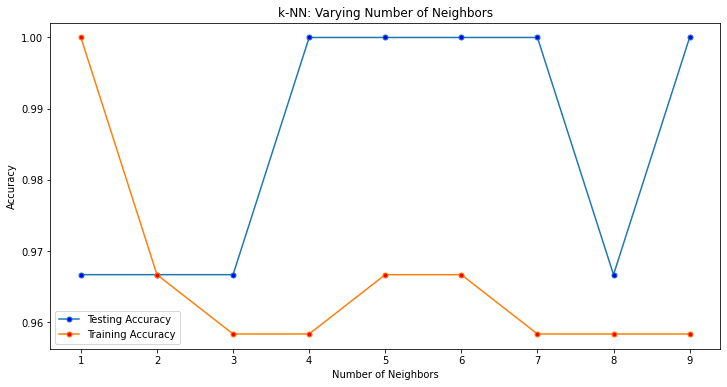

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Setup arrays to store train and test accuracies for K=1 until K=10
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.figure(figsize=(12, 6))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', marker='o', markerfacecolor='blue', markersize=5)
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', marker='o', markerfacecolor='red', markersize=5)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### 6. Membandingkan Error Rate dengan Nilai K.

Text(0, 0.5, 'Mean Error')

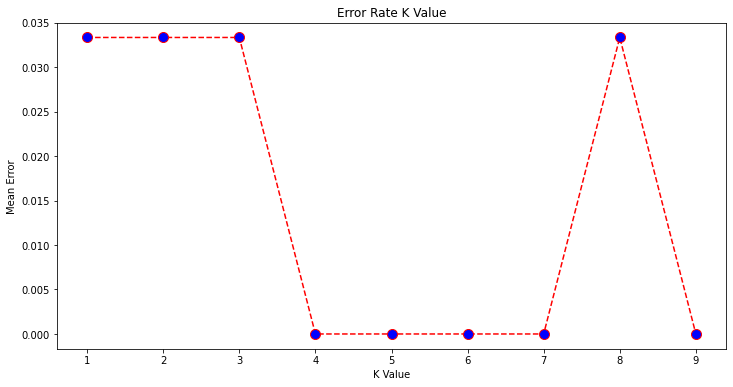

In [12]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1,10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')